In [ ]:
#1. Initialize the model parameters (weights and bias) with random values.
#2. Calculate the predicted values (y-hat) using the current model parameters.
#3. Calculate the cost function (J) using the actual values (y) and the predicted values (y-hat).
#4. Calculate the gradients (partial derivatives) of the cost function with respect to each parameter.
#5. Update the model parameters by subtracting a fraction of the gradients from the current parameter values

In [2]:
#1. Initialize the model parameters (weights and bias) with random values.
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

training_dataset = pd.read_csv('/Users/olawalesalami/ML/aws-ml-bootcamp-2/StandFord Machine Learning/Data/house_prices.csv')

# For simplicity, let's use only one feature (e.g., size of the house)
x1 = training_dataset['size_sqft'].values
x2 = training_dataset['bedrooms'].values
x3 = training_dataset['age_years'].values
X = training_dataset[['size_sqft', 'bedrooms', 'age_years']].values
y = training_dataset['price'].values

m = X.shape[0]  # number of training examples
print(f"Number of training examples: {m}")

print(training_dataset.head(5))

#print(f"First 5 examples:\nX: {X[:5]}\ny: {y[:5]}")

# Initialize weights and bias
np.random.seed(0)
w1 = np.random.randn(1)
w2 = np.random.randn(1)
w3 = np.random.randn(1)
weights = np.array([w1, w2, w3])
weights = weights.flatten() # Reshape to (3, 1) for matrix operations
bias = np.random.randn(1)
print(f"Initial weights: {weights}, Initial bias: {bias}")
print(f"Shape of weights: {weights.shape}")



Number of training examples: 1000
     size_sqft  bedrooms  age_years          price
0  2248.357077         4         42  482622.779930
1  1930.867849         1         18  304397.806645
2  2323.844269         3          4  457008.335401
3  2761.514928         5         10  605122.255898
4  1882.923313         3         11  429719.602090
Initial weights: [1.76405235 0.40015721 0.97873798], Initial bias: [2.2408932]
Shape of weights: (3,)


In [3]:
#2. Calculate the predicted values (y-hat) using the current model parameters.

y_hat = X.dot(weights) + bias
print(f"Predicted values (y-hat): {y_hat[:5]}")
print(X)

Predicted values (y-hat): [4011.16809275 3426.41029363 4106.73925124 4885.48594661 3335.78276959]
[[2.24835708e+03 4.00000000e+00 4.20000000e+01]
 [1.93086785e+03 1.00000000e+00 1.80000000e+01]
 [2.32384427e+03 3.00000000e+00 4.00000000e+00]
 ...
 [2.32042143e+03 1.00000000e+00 2.80000000e+01]
 [1.71441051e+03 3.00000000e+00 3.30000000e+01]
 [2.28629139e+03 2.00000000e+00 3.30000000e+01]]


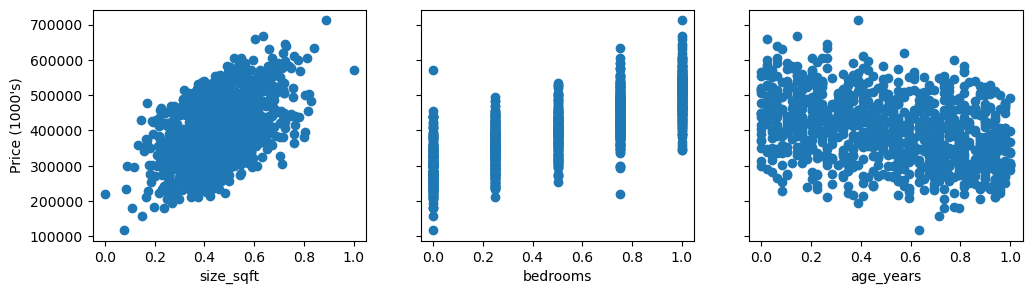

In [44]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
X_features = ['size_sqft', 'bedrooms', 'age_years']
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [45]:
#3. Calculate the cost function (J) using the actual values (y) and the predicted values (y-hat).
def calculate_cost(y, y_hat):
    return np.mean((y - y_hat) ** 2) / 2
# Example usage of cost function
cost = calculate_cost(y, y_hat)
print(f"Cost: {cost}")  # Target with noise 

Cost: 361710708.33766365


In [74]:
#4. Calculate the gradients (partial derivatives) of the cost function with respect to each parameter.
def compute_gradients(X, y, y_hat):
    m = len(y)
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)
    return dw, db
# Example usage of gradient computation
dw, db = compute_gradients(X, y, y_hat)

print(f"Shape of dw: {dw.shape}")
print(f"Shape of db: {db.shape}")
print(f"dw: {dw}")
print(f"db: {db}")
print(f"Gradients - dw: {dw}, db: {db}")




Shape of dw: (3,)
Shape of db: ()
dw: [-1370.57351817     6.41469572   161.45729696]
db: 547.5189185551992
Gradients - dw: [-1370.57351817     6.41469572   161.45729696], db: 547.5189185551992


In [57]:
#5. Update the model parameters by subtracting a fraction of the gradients from the current parameter values
learning_rate = 0.1

def update_parameters(weights, bias, dw, db, learning_rate):
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db
    return weights, bias

# Example usage of parameter update
weights, bias = update_parameters(weights, bias, dw, db, learning_rate)
print(f"Updated weights: {weights}, Updated bias: {bias}")




Updated weights: [188579.29437992 198333.20290707 -52481.64299863], Updated bias: 241327.89146253117


In [59]:
# predict y-hat using updated weights for multiple features and bias
y_hat = X.dot(weights) + bias
print(f"Predicted values after update (y-hat): {y_hat[:5]}")


Predicted values after update (y-hat): [444460.03914823 304535.84190482 439590.13003104 555599.54731587
 408650.80812867]


In [61]:
# check the features x1, x2, x3 and lets rescale them to be between 0 and 1
print(f"Feature 1 (size_sqft) - min: {x1.min()}, max: {x1.max()}")
print(f"Feature 2 (bedrooms) - min: {x2.min()}, max: {x2.max()}")
print(f"Feature 3 (age_years) - min: {x3.min()}, max: {x3.max()}")


# rescale the features x1, x2, x3 to be between 0 and 1 using min-max normalization
x1 = (x1 - x1.min()) / (x1.max() - x1.min())
x2 = (x2 - x2.min()) / (x2.max() - x2.min())
x3 = (x3 - x3.min()) / (x3.max() - x3.min())


X = np.column_stack((x1, x2, x3))
print(X)

# predict y-hat using updated weights for multiple features and bias
y_hat = X.dot(weights) + bias
print(f"Predicted values after update (y-hat): {y_hat[:5]}")    


Feature 1 (size_sqft) - min: 0.0, max: 1.0
Feature 2 (bedrooms) - min: 0.0, max: 1.0
Feature 3 (age_years) - min: 0.0, max: 1.0
[[0.52692164 0.75       0.85714286]
 [0.4374124  0.         0.36734694]
 [0.54820363 0.5        0.08163265]
 ...
 [0.54723863 0.         0.57142857]
 [0.37638692 0.5        0.67346939]
 [0.5376164  0.25       0.67346939]]
Predicted values after update (y-hat): [444460.03914823 304535.84190482 439590.13003104 555599.54731587
 408650.80812867]


In [25]:
# Use z score normalization to rescale the features x1, x2, x3
x1_z = (x1 - x1.mean()) / x1.std()
x2_z = (x2 - x2.mean()) / x2.std()
x3_z = (x3 - x3.mean()) / x3.std()
X_z = np.column_stack((x1, x2, x3))
print(X_z)


[[0.52692164 0.75       0.85714286]
 [0.4374124  0.         0.36734694]
 [0.54820363 0.5        0.08163265]
 ...
 [0.54723863 0.         0.57142857]
 [0.37638692 0.5        0.67346939]
 [0.5376164  0.25       0.67346939]]


In [92]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Use train_test_split to create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (800, 3), y_train: (800,)
Test set shape: X_test: (200, 3), y_test: (200,)


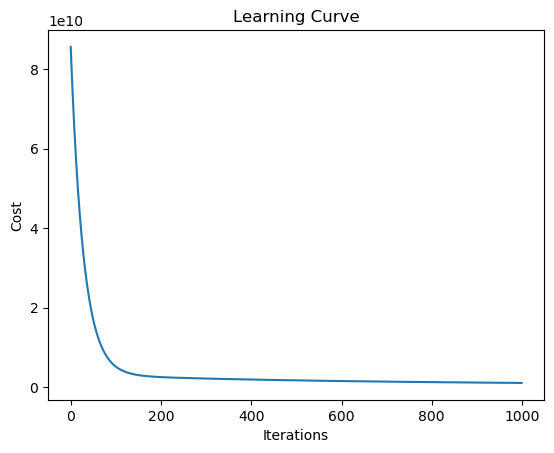

In [93]:
def train_model(X_z, y, learning_rate=0.01, epochs=1000):
    # Initialize parameters
    weights = np.random.randn(X_z.shape[1]) * 0.01
    bias = 0.0
    costs = [] # To store cost at each iteration
    for _ in range(epochs):
        # Forward propagation
        y_hat = np.dot(X_z, weights) + bias
        # Compute cost
        cost = calculate_cost(y, y_hat)
        costs.append(cost)
        # Backward propagation
        dw, db = compute_gradients(X_z, y, y_hat)
        # Update parameters
        weights, bias = update_parameters(weights, bias, dw, db, learning_rate) 
    return weights, bias, costs

# Usage
weights, bias, costs = train_model(X_z, y, learning_rate=0.01, epochs=1000)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.plot(costs)
plt.show()

In [88]:
# Train the model using the training data
final_weights, final_bias, final_costs = train_model(X_train, y_train, learning_rate=0.1, epochs=300)
print(f"Final weights: {final_weights}, Final bias: {final_bias}")

Final weights: [215972.20885544 199617.77468848 -75858.2236101 ], Final bias: 240056.74990142672


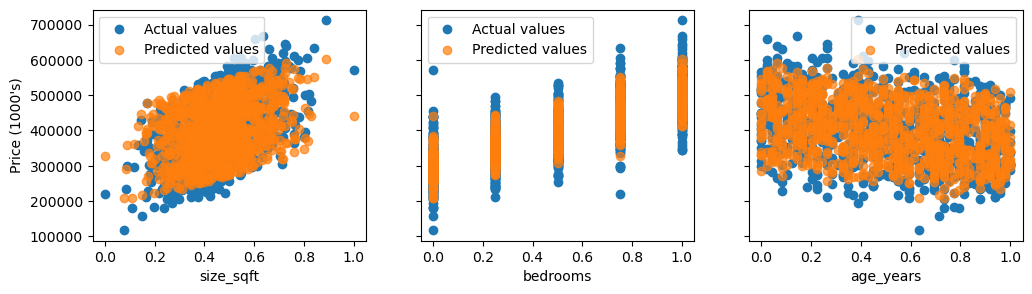

In [90]:
# plot the graphs for the 3 features showing the actual value vs predicted value after training the model
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
X_features = ['size_sqft', 'bedrooms', 'age_years']
y_hat = X_z.dot(final_weights) + final_bias
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y, label='Actual values')
    ax[i].scatter(X[:,i],y_hat, label='Predicted values', alpha=0.7)
    ax[i].set_xlabel(X_features[i])
    ax[i].legend()
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [94]:
# Calculate R-squared score and MSE to evaluate model performance
def r2_score(y_true, y_pred):
    # Calculate R² = 1 - (sum of squared residuals) / (total sum of squares)
    residual_ss = np.sum((y_true - y_pred) ** 2)
    total_ss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (residual_ss / total_ss)
    return r2

def mse(y_true, y_pred):
    # Calculate Mean Squared Error
    return np.mean((y_true - y_pred) ** 2)

# Make predictions on both training and test sets
y_train_pred = X_train.dot(final_weights) + final_bias
y_test_pred = X_test.dot(final_weights) + final_bias

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mse(y_train, y_train_pred)

# Calculate metrics for test set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mse(y_test, y_test_pred)

print("Model Performance Metrics:")
print("\nTraining Set Performance:")
print(f"R² Score: {train_r2:.4f} (Higher is better, max is 1.0)")
print(f"Mean Squared Error: {train_mse:.2f} (Lower is better)")

print("\nTest Set Performance:")
print(f"R² Score: {test_r2:.4f} (Higher is better, max is 1.0)")
print(f"Mean Squared Error: {test_mse:.2f} (Lower is better)")

print("\nInterpretation:")
print(f"- The model explains {train_r2*100:.1f}% of the variance in house prices on the training set")
print(f"- The model explains {test_r2*100:.1f}% of the variance in house prices on the test set")
print("- The R² score ranges from 0 to 1, where:")
print("  * 1.0 is a perfect fit")
print("  * 0.7-0.9 is generally considered a good fit")
print("  * Below 0.5 suggests the model might need improvement")

# Check for overfitting
print("\nModel Generalization:")
r2_diff = train_r2 - test_r2
if abs(r2_diff) > 0.1:
    print(f"Warning: Model shows signs of {'overfitting' if r2_diff > 0 else 'underfitting'}")
    print(f"Difference in R² scores (train - test): {r2_diff:.4f}")
else:
    print("Model generalizes well (similar performance on training and test sets)")

Model Performance Metrics:

Training Set Performance:
R² Score: 0.8876 (Higher is better, max is 1.0)
Mean Squared Error: 991186377.34 (Lower is better)

Test Set Performance:
R² Score: 0.8881 (Higher is better, max is 1.0)
Mean Squared Error: 1031998613.80 (Lower is better)

Interpretation:
- The model explains 88.8% of the variance in house prices on the training set
- The model explains 88.8% of the variance in house prices on the test set
- The R² score ranges from 0 to 1, where:
  * 1.0 is a perfect fit
  * 0.7-0.9 is generally considered a good fit
  * Below 0.5 suggests the model might need improvement

Model Generalization:
Model generalizes well (similar performance on training and test sets)
